In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gymnasium as gym

In [40]:
# Inline display trick
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output

# RL TP1: Basics: playing with an environment

Hédi Hadiji, Feb 23

### Objective of the session.

The goal of this class is to get acquainted with the Gymnasium (```gym```) library. This library provides a natural framework for designing episodic Reinforcement Learning environments and testing algorithms in these environments. We will present a few basic environments, play around with them and recall some concepts that were introduced in class.

Check the documentation for more info:  
- https://github.com/Farama-Foundation/Gymnasium  
- https://gymnasium.farama.org/

The ``` gym ``` library provides Environment objects, that you can interact via their ```reset```and ```step``` methods. Let us go through some examples. 

## Section I : Cliff Walking
    
https://gymnasium.farama.org/environments/toy_text/cliff_walking/

Go through the steps below and come back to answer these questions about the Cliff Walking environment.
### Questions: 

**Question I.1:**

**How many states/observations in the MDP? How many actions?**  

**What is the reward function?**  
 
**What is the transition function?** 

**What is the initial state?**

**What is the termination condition?**  

**Is it stochastic? Deterministic?**  

In [41]:
'''
- 48 states
- 4 actions
- reward is -1 for normal steps, -100 for falling in a hole
- transitions are deterministic
- move to start if you fall in a hole
- follow the direction of the action
- termination : reach the cookie
'''

'\n- 48 states\n- 4 actions\n- reward is -1 for normal steps, -100 for falling in a hole\n- transitions are deterministic\n- move to start if you fall in a hole\n- follow the direction of the action\n- termination : reach the cookie\n'

### Loading the environment
The ```gym.make``` function returns an ```Env``` object, with methods:  
-```reset```  which resets the environment and returns the initial state,  
-```step```  that takes an action as an argument, updates the environment, and returns the next state and reward. 

Let's go through the example. 

In [42]:
env = gym.make("CliffWalking-v0", render_mode='rgb_array')  # Load the environment in env

In [43]:
""" Initialise the environment """

# Reset the environment to get the first observation
observation, info = env.reset()
print(observation)
print(info) # We will not use this

36
{'prob': 1}


In [44]:
print([ m for m in dir(env) if not m.startswith('_')]) # take a look at the available methods of object env
print('\n')
print(env.action_space)
print(env.observation_space)

['action_space', 'class_name', 'close', 'env', 'has_reset', 'metadata', 'np_random', 'observation_space', 'render', 'render_mode', 'reset', 'reward_range', 'spec', 'step', 'unwrapped']


Discrete(4)
Discrete(48)


### Rendering

We can use the ```env.render``` method to take a look at the state of the environment in a more intuitive way. Check the second cell of the notebook for a trick to print the image in notebooks. 

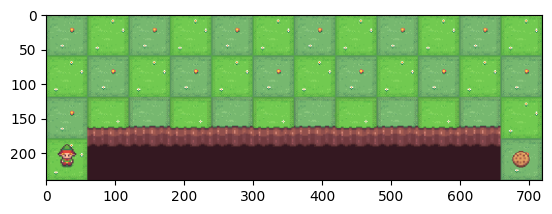

In [45]:
#clear_output(wait=True)
plt.imshow(env.render())
plt.show()

### Actions and Steps

The ```env.step``` method is where the interaction between an agent and the environment happens. In the Cliff walking environemnt, the action space is finite, with $4$ actions numbered from $0$ to $3$.

```env.step``` returns a tuple of $5$ variables: 
- ```observation``` : the next state of the environment after the action was taken. In Cliff Walking, it's an int specifiying the number of the cell the character is in. 
- ```reward``` : a float, the reward for the action
- ```terminated``` : a boolean saying if the state reached is terminal or not.  
- ```truncated``` : a boolean saying if the episode was truncated (e.g. if a time limit was reached or agent got out of bounds, ...)
- ```info``` : more info about the environment. Depends on the environment.  

The last two are not crucial to us for now. 

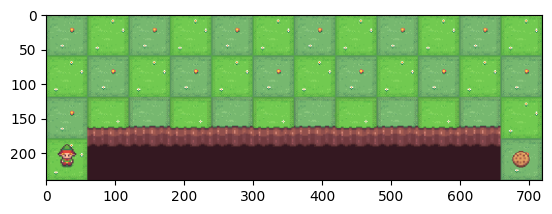

Observation : 36
Reward : -1
Terminated : False


In [46]:
observation, reward, terminated, truncated, info = env.step(2)
clear_output(wait=True)
plt.imshow(env.render())
plt.show()
print("Observation : {}".format(observation))
print("Reward : {}".format(reward))
print("Terminated : {}".format(terminated))

### Question I.2: Write an optimal list of moves to get to the cookie from the start

In [47]:
step_list = [0]+[1]*11+[2] # Replace None by your code
print(step_list)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]


**Test your list to see if you get to the cookie**  
Look at the value of terminated. 

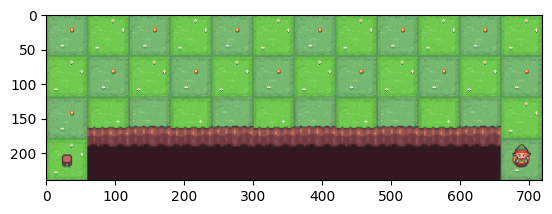

Observation : 47
Reward : -1
Terminated : True


In [48]:
env.reset()
for i in step_list: 
    observation, reward, terminated, truncated, info = env.step(i)
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.show()
print("Observation : {}".format(observation))
print("Reward : {}".format(reward))
print("Terminated : {}".format(terminated))

Note that the environment still runs after reaching the terminal state: you have to reset is yourself:

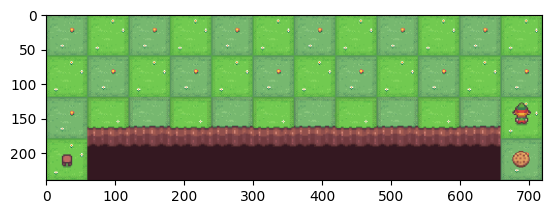

Observation : 47
Reward : -1
Terminated : True


In [49]:
env.step(0)
plt.imshow(env.render())
plt.show()
print("Observation : {}".format(observation))
print("Reward : {}".format(reward))
print("Terminated : {}".format(terminated))

## Question I.3:  


**Describe an optimal policy** Recall a policy must be defined from any state.  

**What is the state-value function of an optimal policy?**  
    
**What is the action-value function of an optimal policy?**  

 
**Does an algorithm need to find the entire optimal policy to perform as well as the optimal policy on this environment?**  

In [50]:
'''
- easy optimal policy
- state-value = - (distance between the state and the cookie)
- action-value = (next reward) - (distance between the next state and the cookie)
'''

'\n- easy optimal policy\n- state-value : distance between the state and the cookie\n- action-value : (reward) - (distance between the next state and the cookie)\n'

# Another classic environment: Cartpole

https://gymnasium.farama.org/environments/classic_control/cart_pole/

Play around a bit with the CartPole environment and answer the same questions as above for this new environment. 

In [51]:
env = gym.make("CartPole-v1", render_mode='rgb_array')  # Load the environment in env

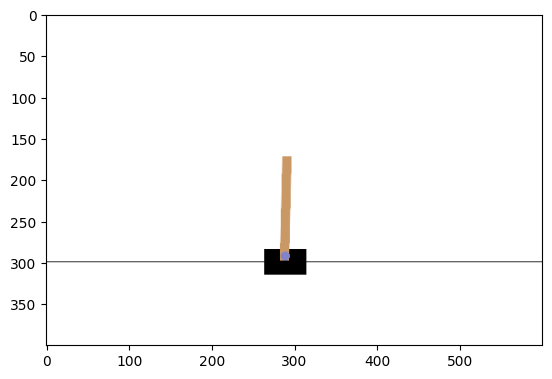

[-0.08747061 -0.00691066  0.02255854 -0.00549698]


In [52]:
# Reset the environment to get the first observation
observation, info = env.reset()

for i in [0, 1]*10:
    observation, reward, terminated, truncated, info = env.step(i)
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.show()
    
print(observation)

### Questions I.4

Play around with environment a bit and look at the documentation to answer the following questions.

**How many states/observations in the MDP? How many actions?**  

**What is the reward function?**  
       
**What is the transition function?** (Do not give an exact answer, it's complicated)  

Check 
[the paper that introduced the environment](http://incompleteideas.net/papers/barto-sutton-anderson-83.pdf) (p.845),  [the corrected equations](https://coneural.org/florian/papers/05_cart_pole.pdf) and 
[the implementation](https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/classic_control/cartpole.py) for details on the transitions.

**What is the initial state?**

**What is the termination condition?**   

**Is it stochastic? Deterministic?**   

**What are the main differences with Cliff Walking?**  

In [53]:
'''
- 
'''

'\n- \n'

# Another one for the road: Frozen Lake

Then we move on to the agent. 

https://gymnasium.farama.org/environments/toy_text/frozen_lake/

### Questions I.4  

**How many states/observations in the MDP? How many actions?**  

**What is the reward function?**  

       
**What is the transition function?** 

**What is the initial state?**

**What is the termination condition?**  

**Is it stochastic? Deterministic?**  

In [54]:
'''
- 
'''

'\n- \n'

<img src='img/frozen_lake_grid.png' height='30%' width='30%' />

In [98]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

print(env.observation_space)
print(env.action_space)

observation, info = env.reset()
print(observation)

Discrete(16)
Discrete(4)
0


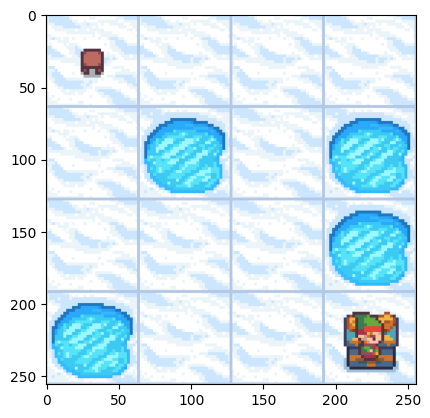

(15, 0, True, False, {'prob': 1.0})


In [99]:
from time import sleep

env.reset()
for action in [1, 1, 2, 2, 1, 2]: 
    env.step(action)
    clear_output(wait=True)
    sleep(1)
    plt.imshow(env.render())
    plt.show()
print(env.step(1))

### Many more environments

These environments are just the most basic ones. Check also  
https://gymnasium.farama.org/environments/mujoco/  
https://gymnasium.farama.org/environments/atari/

And other RL frameworks and datasets  
https://minerl.io/dataset/  
https://github.com/dimikout3/MarsExplorer

# Section II: Building an agent

An agent interacts with the environment and attempts to learn a good policy, that is, a policy with a large value function.

The typical structure of a an agent is as follows. 

```
from gymnasium.spaces import Space # for typing
from typing import Any

class Agent:
    def __init__(self, action_space: Space, observation_space: Space):
        self.action_space = action_space
        self.observation_space = observation_space
    
    def get_action(self, obs: Any) -> Any:
        pass
    
    def update(
        self,
        obs: Any,
        action: int,
        reward: float,
        terminated: bool,
        next_obs: Any,
    )-> None:
        pass
```

The agent needs to know:  
- the action space in which it will play  
- the observation space from which it will receive its information

The agent needs to implement:  
- a policy function ```Agent.get_action``` that takes an observation as input an outputs an action
- an ```Agent.update```function that updates the policy thanks to the data observed.

**Question  II.1: Implement an agent that plays actions at random**  

In [100]:
class RandomAgent:
    def __init__(self, env):
        self.env = env
        self.action_space = env.action_space
        self.observation_space = env.observation_space

    def get_action(self, observation):
        return self.action_space.sample()

    def update(self, *data):
        pass

**Question II.2: Complete the code below to have a function that runs a full episode given an env and an agent**

In [106]:
def run_episode(env, agent, display=False):
    obs, _ = env.reset()
    done = False
    while not done:
        action = agent.get_action(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        
        if display: 
            clear_output(wait=True)
            plt.imshow(env.render())
            plt.show()
            
    return env, agent

**Question II.3: Run a few (e.g. 10) episodes of the random agent. Do you often reach the final state?**

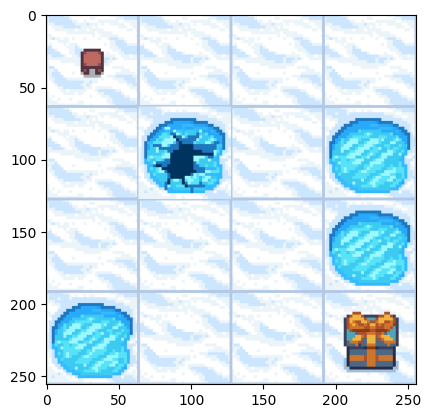

In [109]:
# Your code here
# env = gym.make("CliffWalking-v0", render_mode='rgb_array')  # Load the environment in env
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)


agent = RandomAgent(env)
for _ in range(10):
    run_episode(env, agent, display=True)

# Section III: Evaluating the value of an agent


In this part, we build an agent that moves only down or right and evaluate its state-value function. 
Note that we added some attributes to the agent to store the data seen.

In [121]:
from collections import defaultdict

class DownRight: 
    """
        An agent that only moves down or right, depending on its position on the grid
    """
    def __init__(self, action_space, observation_space):
        self.action_space = action_space
        self.observation_space = observation_space
        
    def get_action(self, obs):
        if obs % 2: 
            return 1
        elif not(obs % 2):
            return 2
    
    def update(self, obs, action, reward, terminated, next_obs):
        pass

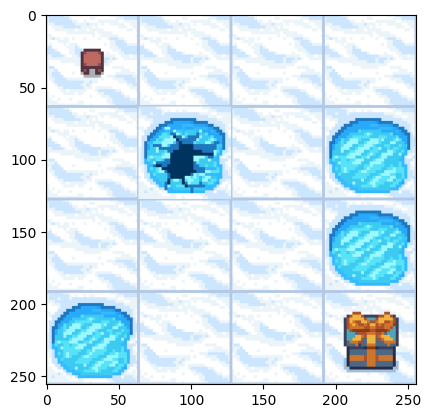

In [122]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)
agent = DownRight(env.action_space, env.observation_space)

seed = 2
agent.action_space.seed(seed)
env.reset(seed=seed)
        
for _ in range(10):
    env, agent = run_episode(env, agent, display=True)

## Learning the value of the DownRight agent

Recall the definition of the value function of a policy, for an MDP with discount factor $\gamma$

$$
V_\pi(s) = \mathbb E \big[ G_t \, \vert  S_t = s \big]=  \mathbb E \bigg[ \sum_{k = 0}^{+\infty} \gamma^k R_{t+k+1} \, \Big\vert \,  S_t = s  \bigg]
$$

**Simple idea to compute this**:  
Start from $s$ and follow $\pi$ and compute the cumulative reward. Run over multiple episodes and take the average to estimate the expectation

**Question III.1: What is the issue with the approach mentioned above?**:


**Solution to the issue**: We are going to run full episodes following the policy, and store the return *once we reach a given state* .


Let us implement this solution. To do so, we add some attributes to the agent to store the data observed.

**Question III.2: Write a function that takes the list of rewards observed in an episode $[R_1, \dots, R_T]$ and a discount factor, and outputs the list of returns $[G_0, \dots, G_{T-1}]$**. Hint: use the formula $G_t = R_{t+1} + \gamma G_{t+1}$

In [134]:
def rewardseq_to_returns(reward_list: list[float], gamma: float) -> list[float]:
    return_list = []
    G=0
    for r in reward_list[::-1]:
        G = r + gamma*G
        return_list.append(G)

    return return_list

In [135]:
#Check that your answer gives the correct

##
r = np.arange(10)
print(r)
print(rewardseq_to_returns(r, 1))
##
# [0 1 2 3 4 5 6 7 8 9]
# [45, 45, 44, 42, 39, 35, 30, 24, 17, 9]

[0 1 2 3 4 5 6 7 8 9]
[9, 17, 24, 30, 35, 39, 42, 44, 45, 45]


We now add some attributes to DownRight.

In [136]:
class DownRightValueLearner(DownRight): 
    """
        An agent that only moves down or right, depending on its position on the grid. Stores the data 
    """
    def __init__(self, action_space, observation_space, gamma = 0.99, name='Down Right Value Learner'):
        super().__init__(action_space, observation_space)
        
        self.current_episode_rewards = []
        self.current_episode_obs = []
        self.gamma = gamma
        
        self.name = name
        
        self.return_values_observed = defaultdict(list) # Dict that will map a state to its value
    
    def update(self, obs, action, reward, terminated, next_obs):
        self.current_episode_rewards.append(reward)
        self.current_episode_obs.append(obs)
        
        if terminated:
            current_episode_returns = rewardseq_to_returns(self.current_episode_rewards, self.gamma)
            seen = []
            for i, s in enumerate(self.current_episode_obs): 
                if s not in seen: 
                    seen.append(s)
                    return_value = current_episode_returns[i]
                    self.return_values_observed[s].append(return_value)
            
            self.current_episode_rewards = []
            self.current_episode_obs = []

**Question III.2: explain what the update function is doing**  


Let us now run the experiment. 

In [137]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array")
agent = DownRightValueLearner(env.action_space, env.observation_space)

seed = 1
agent.action_space.seed(seed)
env.reset(seed=seed)
        
for _ in range(10_000):
    env, agent = run_episode(env, agent, display=False)
    
print([np.mean(vals) for state, vals in agent.return_values_observed.items()])

[]


In [138]:
from itertools import product

def value_grid_estimates(agent):
    """Create value grid given an agent."""

    values = np.zeros(agent.observation_space.n)
    N_visits = np.zeros(agent.observation_space.n)
    for state, value in agent.return_values_observed.items():
        values[state] = np.mean(value)
        N_visits[state] = len(value)
 
    value_grid = np.zeros((4, 4))
    visit_grid = np.zeros((4, 4))
    for i, j in product(range(4), range(4)):
        value_grid[i, j] = values[i*4 + j]
        visit_grid[i, j] = N_visits[i*4 + j]
        
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.add_subplot(1, 2, 1)
    ax1 = sns.heatmap(value_grid, linewidth=0, annot=True, cbar=False)
    ax1.set_title("Estimated values")
    
    
    fig.add_subplot(1, 2, 2)
    
    ax2 = sns.heatmap(visit_grid, linewidth=0, annot=True, cbar=False)
    ax2.set_title("Number of visits")
    
    plt.show()

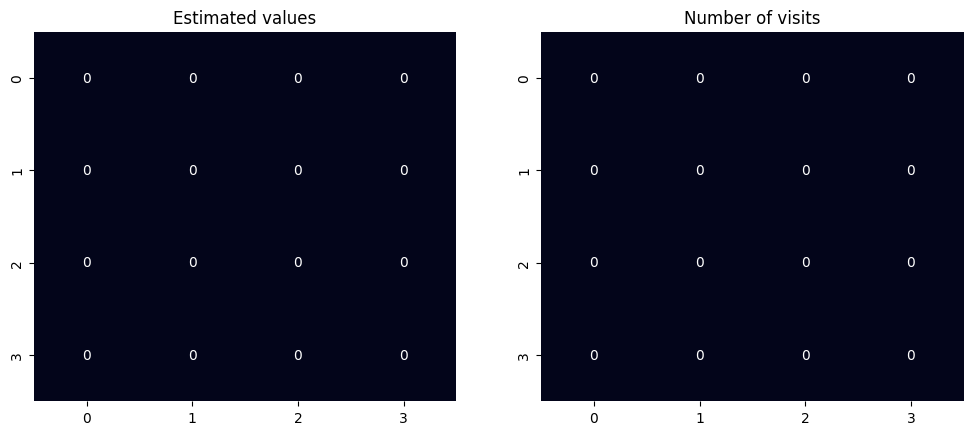

In [139]:
value_grid_estimates(agent)

**Question III.4. Comment on the plot**


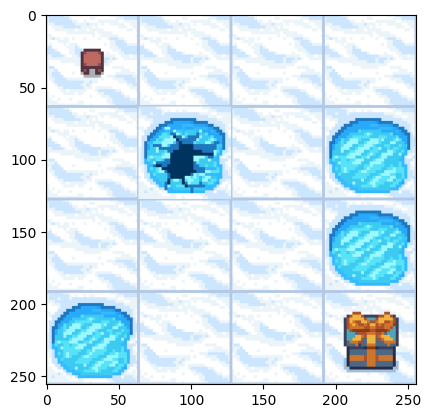

In [140]:
run_episode(env, agent, display=True)
env.close()

## Random questions to think about (some do not have a definite answer)

- **What si the value function of the random agent?**
- **What is the value of a terminal state?** 0
- **What knowledge of the environment did you use to compute the values?**
Nothing  
- **How to learn action-values?**
Do the same, but with an action-value table. 
- **Do you think this is a good way to learn values? What are some pros and cons?**
Simple to implement and interpret. Need to wait until end of episode.  
- **How would you derive a better policy from DownRight, now that you have a good idea of the values.**
Go greedy  

What we did here is evaluating the policy via **First-passage Monte-Carlo Estimation**. **What would happen if you stored the remaining value at every passage through a step?**
Observations would not be independent, so it's not clear that we get a better estimate by averaging more values.

[]


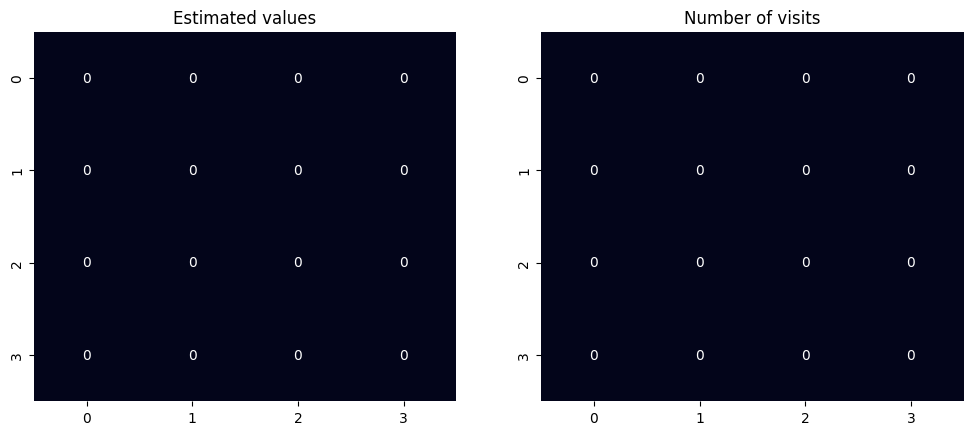

In [141]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array")
agent = DownRightValueLearner(env.action_space, env.observation_space)


# rebuilds a random agent (there are better ways to do this but it's ok just for here)
agent.get_action = (lambda _ : agent.action_space.sample())

seed = 1
agent.action_space.seed(seed)
env.reset(seed=seed)
        
for _ in range(10_000):
    env, agent = run_episode(env, agent, display=False)
    
print([np.mean(vals) for state, vals in agent.return_values_observed.items()])
value_grid_estimates(agent)